In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [2]:
# Define each directory for the required paths with updated paths
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
# Process each directory with lib.DataUitzoekenGui
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [7]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result2:
    merged_df = result2['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Externe ingangsspanning, in V","2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.293000,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,1.293000,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,1.293500,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,1.292857,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,1.292667,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320333,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70


In [8]:
# Convert '1_Tijd' from HHMMSS format to seconds since midnight
def hhmmss_to_seconds(hhmmss):
    hours = hhmmss // 10000
    minutes = (hhmmss % 10000) // 100
    seconds = hhmmss % 100
    return hours * 3600 + minutes * 60 + seconds

# Apply conversion to the time column
merged_df['Time_in_seconds'] = merged_df['1_Tijd'].apply(hhmmss_to_seconds)

#filter de data vanaf tijdstip 170000 tot 190000
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 0]
merged_df = merged_df[merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]
merged_df = merged_df[merged_df['Time_in_seconds'] < 38000]
merged_df = merged_df[merged_df['Time_in_seconds'] > 36750]

display(merged_df)
lib.plot_trajectory_map(merged_df['1_Latitude'].dropna(), merged_df['1_Longitude'].dropna(), merged_df['1_Snelheid over de grond in km/h'].dropna())

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:19:20,9.0,1160.4552,1166.060,101231.0,5233.2851,446.5614,7.2,117.2,241024.0,NaN,...,5.068667,5.754167,0.026667,24.203000,38.700000,12.100000,B,21|02,4575.75,36751.0
0 days 00:19:21,9.0,1161.4551,1167.059,101232.0,5233.2846,446.5631,7.4,116.1,241024.0,NaN,...,5.070429,5.756429,0.026714,24.208286,38.742857,12.100000,B,21|02,4576.65,36752.0
0 days 00:19:22,9.0,1162.4919,1168.095,101233.0,5233.2841,446.5649,7.2,114.2,241024.0,NaN,...,5.070286,5.756571,0.026571,24.205571,38.742857,12.100000,B,21|02,4577.70,36753.0
0 days 00:19:23,9.0,1163.4569,1169.060,101234.0,5233.2838,446.5666,7.4,112.7,241024.0,NaN,...,5.067667,5.753500,0.026333,24.193500,38.733333,12.100000,B,21|02,4578.75,36754.0
0 days 00:19:24,9.0,1164.4660,1170.069,101235.0,5233.2835,446.5684,7.4,110.7,241024.0,NaN,...,5.068857,5.754857,0.026143,24.190857,38.742857,12.071429,B,21|02,4579.65,36755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:40:04,9.0,2404.4745,2410.265,103315.0,5233.3495,446.2886,26.9,299.2,241024.0,NaN,...,5.072000,5.758500,0.026667,24.520833,38.733333,12.100000,B,21|02,5819.70,37995.0
0 days 00:40:05,9.0,2405.4386,2411.229,103316.0,5233.3514,446.2828,26.9,298.4,241024.0,NaN,...,5.073714,5.760857,0.026857,24.525143,38.700000,12.100000,B,21|02,5820.60,37996.0
0 days 00:40:06,9.0,2406.4388,2412.229,103317.0,5233.3532,446.2772,26.9,297.5,241024.0,NaN,...,5.075286,5.761857,0.026857,24.529000,38.757143,12.100000,B,21|02,5821.65,37997.0


In [9]:
# Call the plotting function with the filtered dataset
plot_speeds_with_time_2d(merged_df)

NameError: name 'plot_speeds_with_time_2d' is not defined

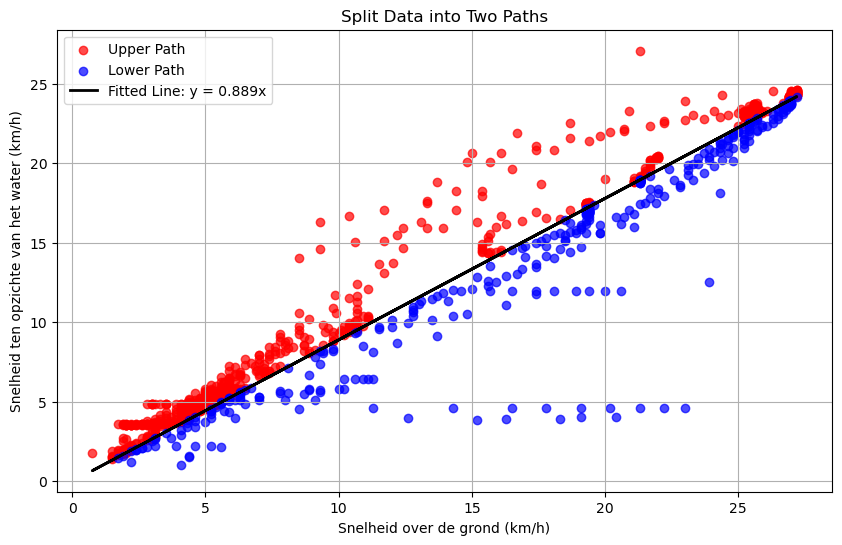

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]

# Plot the split paths
plt.figure(figsize=(10, 6))
plt.scatter(upper_path['1_Snelheid over de grond in km/h'], upper_path['1_Snelheid tenopzichte van het water in Kilometers per uur'], label="Upper Path", color="red", alpha=0.7)
plt.scatter(lower_path['1_Snelheid over de grond in km/h'], lower_path['1_Snelheid tenopzichte van het water in Kilometers per uur'], label="Lower Path", color="blue", alpha=0.7)
plt.plot(x, y_predicted, label="Fitted Line: y = 0.889x", color="black", linewidth=2)
plt.xlabel("Snelheid over de grond (km/h)")
plt.ylabel("Snelheid ten opzichte van het water (km/h)")
plt.legend()
plt.title("Split Data into Two Paths")
plt.grid(True)
plt.show()


In [13]:
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:19:20,9.0,1160.4552,1166.060,101231.0,5233.2851,446.5614,7.2,117.2,241024.0,NaN,...,5.068667,5.754167,0.026667,24.203000,38.700000,12.100000,B,21|02,4575.75,36751.0
0 days 00:19:21,9.0,1161.4551,1167.059,101232.0,5233.2846,446.5631,7.4,116.1,241024.0,NaN,...,5.070429,5.756429,0.026714,24.208286,38.742857,12.100000,B,21|02,4576.65,36752.0
0 days 00:19:22,9.0,1162.4919,1168.095,101233.0,5233.2841,446.5649,7.2,114.2,241024.0,NaN,...,5.070286,5.756571,0.026571,24.205571,38.742857,12.100000,B,21|02,4577.70,36753.0
0 days 00:19:23,9.0,1163.4569,1169.060,101234.0,5233.2838,446.5666,7.4,112.7,241024.0,NaN,...,5.067667,5.753500,0.026333,24.193500,38.733333,12.100000,B,21|02,4578.75,36754.0
0 days 00:19:24,9.0,1164.4660,1170.069,101235.0,5233.2835,446.5684,7.4,110.7,241024.0,NaN,...,5.068857,5.754857,0.026143,24.190857,38.742857,12.071429,B,21|02,4579.65,36755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:40:04,9.0,2404.4745,2410.265,103315.0,5233.3495,446.2886,26.9,299.2,241024.0,NaN,...,5.072000,5.758500,0.026667,24.520833,38.733333,12.100000,B,21|02,5819.70,37995.0
0 days 00:40:05,9.0,2405.4386,2411.229,103316.0,5233.3514,446.2828,26.9,298.4,241024.0,NaN,...,5.073714,5.760857,0.026857,24.525143,38.700000,12.100000,B,21|02,5820.60,37996.0
0 days 00:40:06,9.0,2406.4388,2412.229,103317.0,5233.3532,446.2772,26.9,297.5,241024.0,NaN,...,5.075286,5.761857,0.026857,24.529000,38.757143,12.100000,B,21|02,5821.65,37997.0
